In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muhammedazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muhammedazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muhammedazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
df = pd.read_csv('dataset.csv', usecols = ['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words', 'last_editor_gender', 'category'])
if not df.empty: print("Dataset loaded successfully.")

Dataset loaded successfully.


In [41]:
print('Checking for missing values')
missing_values = df.isnull().sum()
print(missing_values)

# Remove rows with missing values
df = df.dropna()

print('\n' + 'Removed missing values')
missing_values = df.isnull().sum()
print(missing_values)

Checking for missing values
par_id                 0
paragraph              0
has_entity             0
lexicon_count          0
difficult_words       18
last_editor_gender     0
category              61
dtype: int64

Removed missing values
par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
dtype: int64


In [42]:
print('Checking for unique values in the category column')
category_counts = df['category'].unique()
print(category_counts)
# Convert the 'category' column to lowercase
df['category'] = df['category'].str.lower()

print('\n' + 'Fixed the case of the category column')
category_counts = df['category'].unique()
print(category_counts)

Checking for unique values in the category column
['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence' 'Philosophy' 'Programming'
 'Artificial intelligence' 'Biographies'
 'Movies about artificial intelligence']

Fixed the case of the category column
['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence']


In [43]:
print('Checking for unique values in the has_entity column')
entity_counts = df['has_entity'].unique()
print(entity_counts)

# Removing rows with 'data missing' in the 'has_entity' column
df = df[df['has_entity'] != 'data missing']

print('\n' + 'Removed rows with "data missing" in the has_entity column')
entity_counts = df['has_entity'].unique()
print(entity_counts)

Checking for unique values in the has_entity column
['ORG_YES_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_NO_PERSON_NO_'
 'ORG_NO_PRODUCT_YES_PERSON_NO_' 'ORG_YES_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_NO_' 'ORG_NO_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_YES_PERSON_NO_'
 'data missing']

Removed rows with "data missing" in the has_entity column
['ORG_YES_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_NO_PERSON_NO_'
 'ORG_NO_PRODUCT_YES_PERSON_NO_' 'ORG_YES_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_NO_' 'ORG_NO_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_YES_PERSON_NO_']


In [10]:
entity_count = df['has_entity'].unique()
print(entity_count)

['ORG_YES_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_NO_PERSON_NO_'
 'ORG_NO_PRODUCT_YES_PERSON_NO_' 'ORG_YES_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_NO_' 'ORG_NO_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_YES_PERSON_NO_']


In [45]:
def clean_text(text):
    # Remove punctuation marks and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 'df' DataFrame containing the 'paragraph' column
df['cleaned_paragraph'] = df['paragraph'].apply(clean_text)

Imbalanced Category Distribution:
category
biographies                             2940
philosophy                              2588
programming                             1982
artificial intelligence                 1568
movies about artificial intelligence     166
Name: count, dtype: int64

Balanced Category Distribution:
balanced_category
artificial intelligence                 2940
biographies                             2940
movies about artificial intelligence    2940
philosophy                              2940
programming                             2940
Name: count, dtype: int64


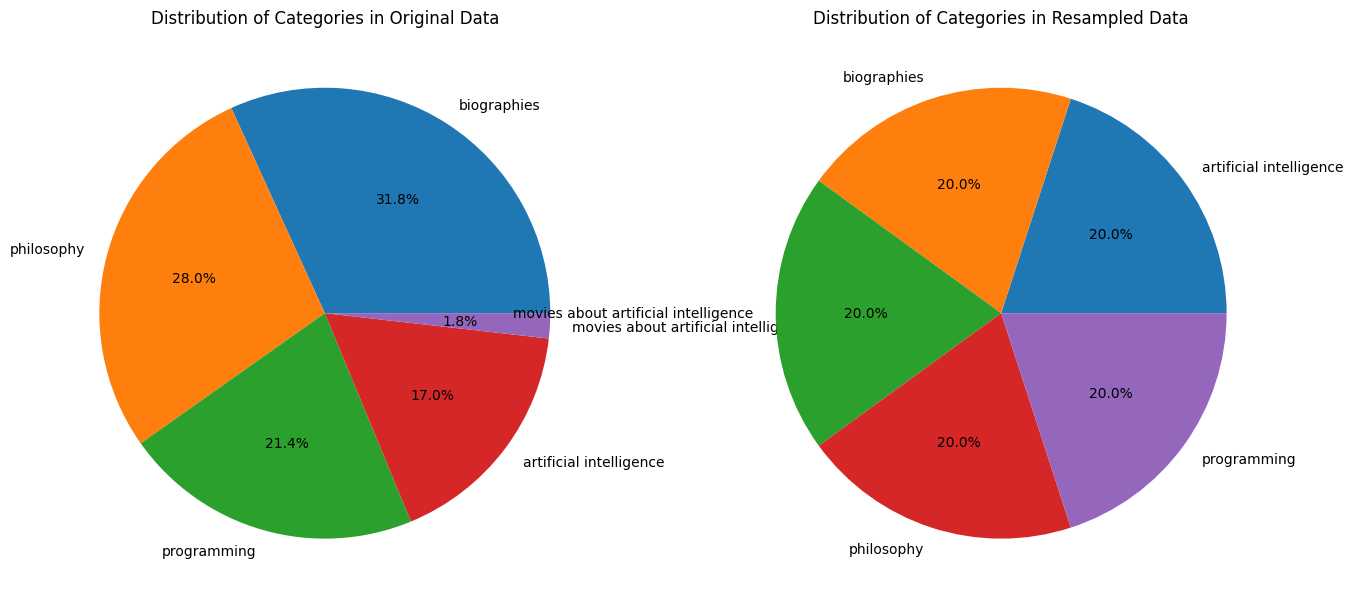

In [47]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Assuming 'df' is already loaded with your data

# Displaying the imbalanced category distribution
print("Imbalanced Category Distribution:")
print(df['category'].value_counts())

# Encode the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['category'])
X_text = df['cleaned_paragraph'] # Assuming you have a column 'cleaned_paragraph' that contains the cleaned text

# Vectorizing the text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vectorized = tfidf_vectorizer.fit_transform(X_text)

# Setting up SMOTE and under-sampling within a pipeline
resampling_pipeline = IMBPipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('under', RandomUnderSampler(random_state=42))
])

X_resampled, y_resampled = resampling_pipeline.fit_resample(X_vectorized, y_encoded)

# Decode the labels back to original category names
y_resampled_decoded = encoder.inverse_transform(y_resampled)

# Create a DataFrame to display the before and after category distribution
resampled_df = pd.DataFrame(y_resampled_decoded, columns=['balanced_category'])

print("\nBalanced Category Distribution:")
print(resampled_df['balanced_category'].value_counts())

# Count the occurrences of each category in the original and resampled data
original_category_counts = df['category'].value_counts()
resampled_category_counts = resampled_df['balanced_category'].value_counts()

# Create a figure with two subplots
plt.figure(figsize=(16, 8))

# Create the first pie chart for original data
plt.subplot(1, 2, 1)
plt.pie(original_category_counts.values, labels=original_category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories in Original Data')

# Create the second pie chart for resampled data
plt.subplot(1, 2, 2)
plt.pie(resampled_category_counts.values, labels=resampled_category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories in Resampled Data')

plt.show()

In [48]:
import nltk
from nltk.tokenize import word_tokenize

# Assuming 'df' is your DataFrame containing the 'cleaned_paragraph' column
# Tokenize each paragraph and store the tokens in a new column 'tokenized_paragraph'
df['tokenized_paragraph'] = df['cleaned_paragraph'].apply(lambda x: word_tokenize(x))

# Display the first few rows to verify the tokenization
print(df[['cleaned_paragraph', 'tokenized_paragraph']].head())

                                   cleaned_paragraph  \
0  Ramsay was born in Glasgow on October He was a...   
1  It has been widely estimated for at least the ...   
2  He went on to win the Royal Medal of the Royal...   
3  The changes have altered many underlying assum...   
4  After these novels were published Disraeli dec...   

                                 tokenized_paragraph  
0  [Ramsay, was, born, in, Glasgow, on, October, ...  
1  [It, has, been, widely, estimated, for, at, le...  
2  [He, went, on, to, win, the, Royal, Medal, of,...  
3  [The, changes, have, altered, many, underlying...  
4  [After, these, novels, were, published, Disrae...  


This classify text paragraphs into specific topics based on the content and any mentioned entities such as persons, organizations, or products. The model should consider not just the textual content but also whether the paragraph mentions specific entities, enhancing its prediction accuracy.

In [50]:
# Splitting the "has_entity" column into three separate binary columns
df['ORG'] = df['has_entity'].str.contains('ORG_YES').astype(int)
df['PRODUCT'] = df['has_entity'].str.contains('PRODUCT_YES').astype(int)
df['PERSON'] = df['has_entity'].str.contains('PERSON_YES').astype(int)

# Displaying the first few rows to verify the changes
print(df[['has_entity', 'ORG', 'PRODUCT', 'PERSON']].head())

                        has_entity  ORG  PRODUCT  PERSON
0   ORG_YES_PRODUCT_NO_PERSON_YES_    1        0       1
1    ORG_YES_PRODUCT_NO_PERSON_NO_    1        0       0
2    ORG_YES_PRODUCT_NO_PERSON_NO_    1        0       0
3    ORG_NO_PRODUCT_YES_PERSON_NO_    0        1       0
4  ORG_YES_PRODUCT_YES_PERSON_YES_    1        1       1


In [51]:
X = df[['tokenized_paragraph', 'has_entity', 'ORG', 'PRODUCT', 'PERSON']]
y =df['category']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

v = dict(zip(list(y), df['category'].to_list()))

In [52]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer="word", stop_words="english")),
    ('tfidf', TfidfTransformer(use_idf=True)), 
    ('clf', MultinomialNB(alpha=.01)),
])

In [53]:
# Convert the list of tokens back into a single string per document
x_train_processed = x_train['tokenized_paragraph'].apply(' '.join)

# Now, fit your model
text_clf.fit(x_train_processed, y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [54]:
X_TEST = x_test['tokenized_paragraph'].to_list()
Y_TEST = list(y_test)

In [55]:
# Convert the list to a pandas Series
X_TEST_series = pd.Series(X_TEST)

# Apply the lambda function to process the data
X_TEST_processed = X_TEST_series.apply(lambda tokens: ' '.join(tokens))

# Now, use this processed data for prediction
predicted = text_clf.predict(X_TEST_processed)

In [56]:
c = 0

for doc, category in zip(X_TEST, predicted):
    
    if c == 2:break
    
    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    c = c + 1 

-------------------------------------------------------
['Though', 'he', 'had', 'been', 'an', 'active', 'cyclist', 'in', 'his', 'youth', 'his', 'health', 'seriously', 'declined', 'in', 'his', 'sixth', 'decade', 'During', 'this', 'time', 'Heaviside', 'would', 'sign', 'letters', 'with', 'the', 'initials', 'WORM', 'after', 'his', 'name', 'Heaviside', 'also', 'reportedly', 'started', 'painting', 'his', 'fingernails', 'pink', 'and', 'had', 'granite', 'blocks', 'moved', 'into', 'his', 'house', 'for', 'furniture', 'xx', 'In', 'he', 'became', 'the', 'first', 'recipient', 'of', 'the', 'Faraday', 'Medal', 'which', 'was', 'established', 'that', 'year']
biographies
-------------------------------------------------------
-------------------------------------------------------
['Important', 'philosophers', 'who', 'developed', 'natural', 'law', 'include', 'Aristotle', 'Plato', 'Seneca', 'the', 'Younger', 'Thomas', 'Aquinas', 'and', 'Immanuel', 'Kant', 'People', 'who', 'criticized', 'this', 'approach'

In [57]:
np.mean(predicted == y_test)

0.9351000540832882

In [58]:
model_extn = '.pkl'
model_name = 'model_cat_t1' + model_extn

import pickle
with open(model_name,'wb') as f:
    pickle.dump(text_clf,f)

In [59]:
# load
with open(model_name, 'rb') as f:
    clf2 = pickle.load(f)

In [70]:
docs_new = ["History will place an asterisk next to A.I. as the film Stanley Kubrick might have directed. But let the record also show that Kubrick--after developing this project for some 15 years--wanted Steven Spielberg to helm this astonishing sci-fi rendition of Pinocchio, claiming (with good reason) that it veered closer to Spielberg's kinder, gentler sensibilities."]
predicted = clf2.predict(docs_new)

In [71]:
v[predicted[0]]

'movies about artificial intelligence'